In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm

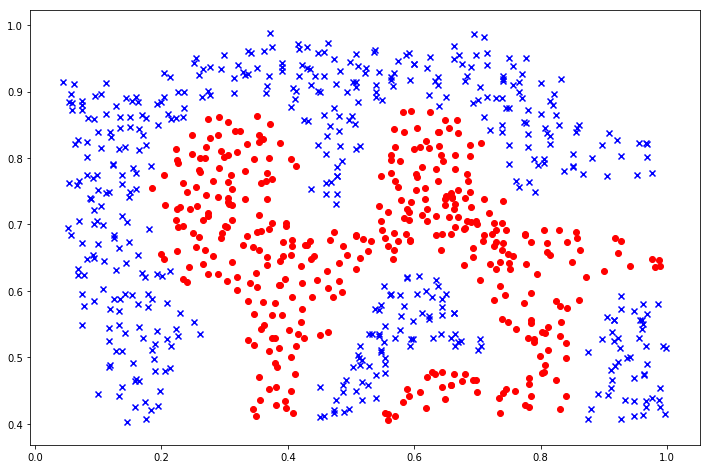

In [2]:
data = loadmat('ex6data2.mat')
X = data['X']
y = data['y']
fig, ax = plt.subplots(figsize = (12, 8))
for i in range(len(y)):
    if y[i] == 1:
        ax.scatter(X[i][0], X[i][1], marker = 'x', color = 'b')
    else:
        ax.scatter(X[i][0], X[i][1], marker = 'o', color = 'r')
plt.show()

In [3]:
#fig, ax = plt.subplots()
#ax.scatter(X[:,0], X[:,1], c = y.flatten())

In [4]:
def gaussKernel(x1, x2, sigma):
    return np.exp(-np.sum(np.power(x1 - x2, 2)) / (2 * sigma ** 2))
gaussKernel(np.array([1,2,1]), np.array([0,4,-1]), 2)

0.32465246735834974

In [5]:
svc = svm.SVC(C = 100, gamma = 10, probability = True)
# gammar 也就是内核中的 sigma
# kernel rbf高斯内核
# probability 不只分类，还计算概率
svc.fit(X, y.ravel())
svc.score(X, y.ravel())

0.9698725376593279

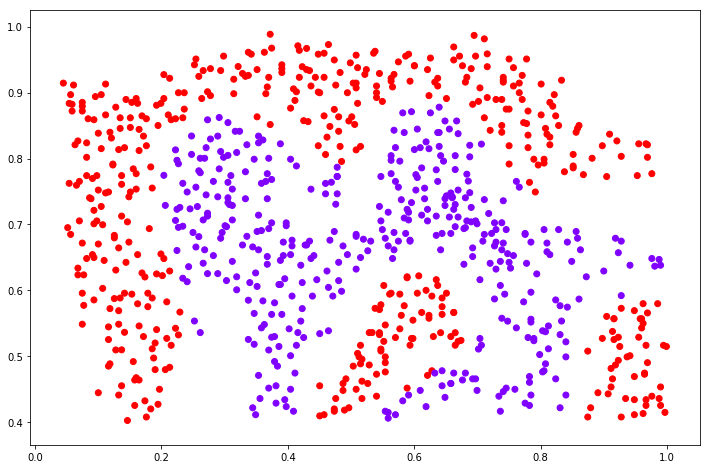

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:,0], X[:,1], c = svc.predict(X), cmap = 'rainbow')
plt.show()

In [7]:
data = loadmat('ex6data3.mat')
X = data['X']
y = data['y'].ravel()
Xval = data['Xval']
yval = data['yval'].ravel()

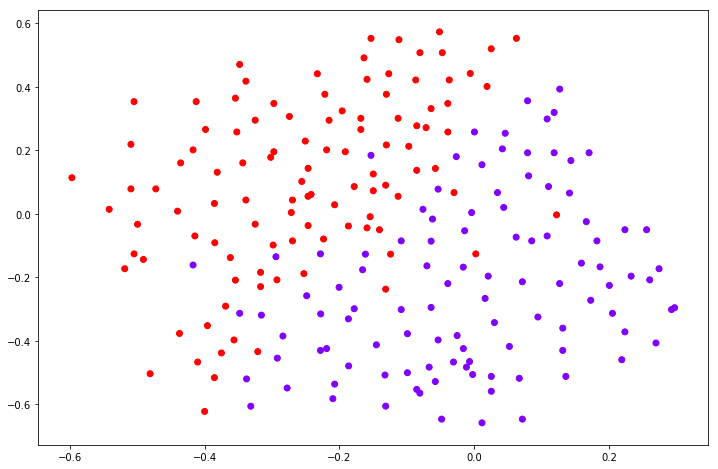

In [8]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow')
plt.show()

In [9]:
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
bestScore = 0
bestC = 0
bestSigma = 0
for i in C:
    for j in sigma:
        svc = svm.SVC(C = i, gamma = j)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        if score > bestScore:
            bestScore = score
            bestC = i
            bestSigma = j
bestScore, bestC, bestSigma

(0.965, 3, 30)